# Imports

In [2]:
import multiprocessing as mp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

from lib.util.env import getbase_dir
from encrypt import encrypt_data_in_memory
from lib.mybloom.bloomutil import jaccard_coefficient
from splitting_bf.evaluation import split_bf #change method
from splitting_bf.evaluation import simulated_sbf_protocol


import matplotlib.ticker as ticker

#isTrueMatch(gold_standard_dblp_acm,'journals/sigmod/Dogac02',507340)

# Metodos

## Metodos de plotagem

In [7]:
def plot_line_metric(dfm, title, ds='dblp_acm', dir='sbf_03'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(data=pf, x='threshold_alfa', y='vals', hue='bf_type',
                 linewidth=2.5, dashes=[(0, 0), (2, 2)])
    # sns.barplot(data=pf, x='threshold_alfa', y='vals', hue='cols',
    #             linewidth=2.5)
    # palette = "tab10"
    ax.set_title(title)
    ax.set_ylabel("")
    ax.grid('on')
    plt.tight_layout()
    plt.show()
    fig.savefig(file)
    file = getbase_dir(['results', dir, ds + title + '.png'])


def plot_metric(df,metric='f1'):
    """

    :param df:
    :param metric: recall, precision and f1 (default)
    :return:
    """

    # global fig, ax, y, x
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(data=df, x='alfa', y=metric+'_sbf',
                capsize=.2, color='gray')
    # ax2 = ax.twinx()
    y = []
    for x in df.alfa.unique():
        y.append(df[df.alfa == x][metric+'_bf_full'].max())
    ax.plot(ax.get_xticks(), y, color='red',
            linestyle='--', linewidth=3, label='full_bf')
    ax.grid('on')
    # ax2.grid(False)
    # plt.tight_layout()
    plt.show()
    plt.close()
    plt.clf()


# Processamento

In [8]:
v = 'allAlfas'
final_result = []

for ds in ['ncvr','mvr','yv-er']:
    rf = ds+'_final_result_'+v+'.csv'
    if len(final_result) == 0:
        final_result = pd.read_csv(getbase_dir(['results', 'abel_quality_results']) + rf)
    else:
        final_result = pd.concat([final_result,
                                  pd.read_csv(getbase_dir(['results', 'abel_quality_results']) + rf)])
    

In [9]:
final_result = final_result[final_result.sbf_splits != max(final_result.sbf_splits.unique())]

## Figura 1

Mericas individualizadas

In [ ]:
plot_metric(final_result, metric='f1')
plot_metric(final_result,metric='precision')
plot_metric(final_result, metric='recall')

Todas as metricas

In [7]:
def plot_all_metrics(df,ds='dblp-acm',fsize=(4, 10),palleta='Blues'):
    """

    :param df:
    :param metric: recall, precision and f1 (default)
    :return:
    """
    

    sns.set_style("whitegrid")

    # global fig, ax, y, x
#     fig, axs = plt.subplots(figsize=fsize, ncols=3)
    fig, axs = plt.subplots(figsize=fsize, nrows=3)
    metrics = ['f1','precision', 'recall']
    for i in range(0, len(axs)):
        ax = axs[i]
        metric = metrics[i]
#         sns.barplot(data=df, x='alfa', y=metrics[i] + '_sbf',
#                     capsize=.1, hue='ds_name', alpha=0.8 ,
#                     ax=ax)
        # sns.barplot(data=df, x='alfa', y=metrics[i] + '_sbf',
        #             capsize=.2, ax=ax)

        sns.barplot(data=df, x='alfa', y=metrics[i] + '_sbf',
                    capsize=.05, hue='ds_name', alpha=0.8 ,
                    ax=ax,
                    palette=palleta)

        ax.set_title(metric)

        paleta = sns.color_palette(palleta,n_colors=len(df.ds_name.unique()))
        cp = 0
        
        for j in df.ds_name.unique():
            ldf = df[df.ds_name == j]
            y = []
            lds = []
            for x in ldf.alfa.unique():
                y.append(ldf[ldf.alfa == x][metrics[i] + '_bf_full'].mean())


            ax.plot(ax.get_xticks(), y, color=paleta[cp], marker='o',
                    linestyle='--', linewidth=2)#, label='full_bf'+j)
            cp+=1
        
                
#         ax2 = ax.twinx()

        
#         sns.lineplot(data=df, x=df.alfa, y=metrics[i] + '_bf_full',
#                     linestyle='--', linewidth=2, hue='ds_name', alpha=0.8 ,
#                     ax=ax2
#                     )
        
        ax.grid('off')
        ax.set_ylabel("")
        ax.set_xlabel(r'$\alpha$')
        
        if i == 2:
            ax.legend(loc='upper center', bbox_to_anchor=(.5, -.2),
                      title= 'source dataset',
                      fancybox=True, frameon=False , ncol=3)
        else:
            ax.get_legend().remove()

    plt.tight_layout()

    plt.show()
    plt.close()
    plt.clf()
#     file = getbase_dir(['results', 'abel_01']) + 'plot_all_metrics_considering_alfas_' + ds + '.png'
    file = getbase_dir(['results', 'figs']) + 'plot_all_metrics_considering_alfas_' + ds + '.png'
    file = getbase_dir(['results', 'figs']) + 'plot_all_metrics_considering_alfas_' + ds + '.pdf'
    fig.savefig(file, dpi=300)

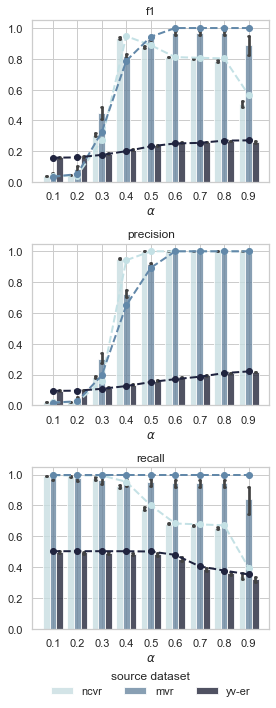

<Figure size 432x288 with 0 Axes>

In [185]:
plot_all_metrics(final_result[final_result.ds_name != 'dblp-acm'],palleta='ch:s=.00,rot=-.20')

teste estatiscos da figura 1

In [186]:
from scipy.stats import wilcoxon , ttest_ind
#  null hypothesis of identical average scores. (< 0.05)

df_stat = final_result[final_result.ds_name != 'dblp-acm']
for metric in ['f1','precision','recall']:
    y_bf = []
    y_sbf = []
    # metric = 'f1'
    for x in final_result.alfa.unique():
        y_bf.append(df_stat[df_stat.alfa == x][metric + '_bf_full'].mean())
        y_sbf.append(df_stat[df_stat.alfa == x][metric + '_sbf'].median())
    print(metric)
        # print(wilcoxon(final_result[metric + '_bf_full'], final_result[metric + '_bf_full']))
    print(ttest_ind(y_bf,y_sbf))
del df_stat

f1
Ttest_indResult(statistic=-0.4523698871906968, pvalue=0.6570755767008308)
precision
Ttest_indResult(statistic=-0.881518330469625, pvalue=0.39108793697894617)
recall
Ttest_indResult(statistic=-0.4161802526020034, pvalue=0.6828070985439263)


## Figura 2

#### Metodo da plotagem

In [4]:
def plot_quality_considering_error(df,limiar,metric='f1'):

    ldf = df[df.alfa == limiar].round(3)
    ldf.ls = ldf.ls.astype(str) + '%'
    # ldf['ls'] = (final_result.bf_len / final_result.sbf_splits) / final_result.bf_len
    # ldf.sbf_splits = ldf.sbf_splits.astype(str)
    fig, ax = plt.subplots(figsize=(8, 5))
    # palette = dict(zip(ldf.sbf_splits.unique(), sns.color_palette()))
    # palette.update({"Total": "k"})
    sns.lineplot(data=ldf, x='beta_error', y=metric+'_sbf', hue="ls")
    y = []
    for x in ax.get_xticks():
        y.append(df[metric+'_bf_full'].max())
    ax.plot(ax.get_xticks(), y, color='red',
            linestyle='--', linewidth=3, label='Sine')
    # sns.lineplot(data=ldf, x='beta_error', y='f1_sbf', hue="sbf_splits", palette=palette)
    ax.grid(True)
    plt.show()
    plt.close()
    plt.clf()

def plot_all_quality_considering_error(df,limiar,ds='dblp-acm',pontos=[],fs=(12, 5.5)):
    """

    :param df:
    :param limiar:
    :param ds:
    :return:
    """

    ldf = df[df.alfa == limiar]

    ldf['z'] = df.bf_len / df.sbf_splits
    ldf['split_length'] = ldf.ls.round(3).astype(str) + '% '
    ldf.split_length = ldf.split_length + '(' +ldf.z.astype(str) + ' bits)'
    ldf['beta'] = limiar - ldf.beta_error
    # min_x = ldf.beta.min()
    # max_x = ldf.beta.max()
    min_x = ldf.beta_error.min()
    max_x = ldf.beta_error.max()

    fig, axs = plt.subplots(figsize=fs, ncols=3)
    metrics = ['precision', 'recall','f1']
    for i in range(0, len(axs)):
        metric = metrics[i]

        ax = axs[i]
        ax.set_xlim(min_x,max_x)
        # ax.set_xlim(max_x,min_x)
        ax.set_title(r"" +metric + " $\\alpha$ ="+ str(limiar) )

        g = sns.lineplot(data=ldf, x='beta_error', y=metric + '_sbf',
                         hue="split_length", ax=ax , linewidth=2)
        # g = sns.lineplot(data=ldf, x='beta', y=metric+'_sbf',
        #                 hue="split_length", ax=ax)

        ax.set_ylabel("")
        ax.set_xlabel("error \n $\\beta = \\alpha - error$")

        y = []
        for x in ax.get_xticks():
            y.append(ldf[metric+'_bf_full'].mean())

        ax.plot(ax.get_xticks(), y, color='red',
                linestyle='--', linewidth=2, label='full_bf')

        #### errros
        if len(pontos) != 0:
            if metric != 'f1-':
                cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
                cc = 0
                for vx in pontos.round(2).y:
                    # ax.axvline(x=vx, linewidth=2, c=c.colors[cc], alpha=0.8)
                    ax.axvline(x=vx, linewidth=10, c=cores[cc], alpha=0.2)
                    cc+=1
            # ax.scatter(pontos.x, pontos.y ,c=pontos.x, #s=scale, label=color,
            #         alpha=0.8, edgecolors='none')

            # ax.axhline(pontos.y, linewidth=2, c=pontos.x, alpha=0.8)


        ax.grid(True)
        if i == 1:
            g.legend(loc='lower center', bbox_to_anchor= (0.5, -.5) ,
                     borderaxespad=0, frameon=False,
                     fontsize = 'medium', ncol=3 )
        else:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
            ax.get_legend().remove()
            # fontsize: int or float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.clf()
    if len(pontos) == 0:
        file = getbase_dir(['results', 'vldb']) + 'plot_all_quality_considering_error_'+ds+'_alfa_'+str(limiar)+'.png'
    else:
        file = getbase_dir(['results', 'vldb']) + 'plot_all_quality_considering_error_' +ds+ '_alfa_' + str(limiar) + '_width_region.png'
    
    fig.savefig(file,dpi=300)
    file = getbase_dir(['results', 'vldb']) + 'plot_all_quality_considering_error_' +ds+ '_alfa_' + str(limiar) + '_width_region.pdf'
    fig.savefig(file)
    
    
# plot_all_quality_considering_error(final_result[final_result.beta_error <= .49], .5 ,pontos=pontos)

#### Plotagem

Definindo as regiões beta

In [13]:
a = -0.042876301194393125
b = 3.2574724870013103

fe1 = lambda x, a, b: a * np.log(b * x)
mi = fe1(.99999,a,b)
ma = fe1(.00001,a,b)
#fe1 = lambda x: -np.log(x)
#mi = fe1(.9999999999999)
#ma = fe1(.0000000000001)

normalize = lambda x,min,max:  (x - min) / (max - min)

pontos = []
for i in final_result.ls.unique():
    # print("{} & {} & \\\\".format(i,fe1(i,a,b)))
    #n = normalize(fe1(i), mi, ma)
    x = fe1(i,a,b)
    n = normalize(x, mi, ma)
    
    pontos.append([i,n,x])
    #print("{0:.3f} & {1:.2f} \\\\".format(i, n))

pontos = pd.DataFrame(pontos,columns=['x','y','z'])
pontos

,x,y,z
0,0.125000,0.180617,0.038524
1,0.062500,0.240823,0.068244
2,0.031250,0.301029,0.097963
3,0.015625,0.361235,0.127683


#### Resultado

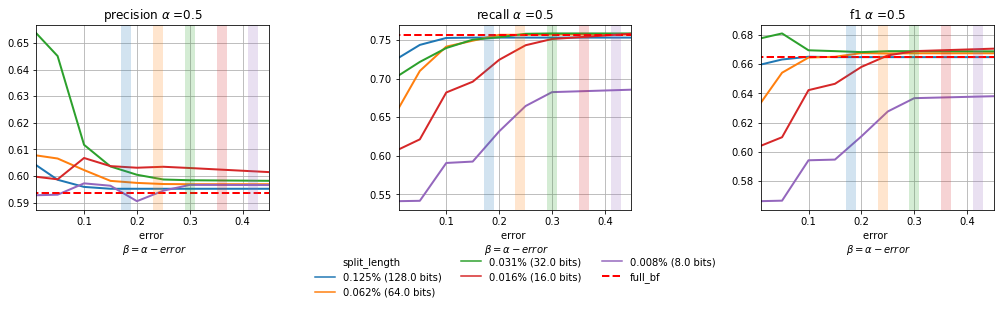

<Figure size 432x288 with 0 Axes>

In [13]:
#plot_all_quality_considering_error(final_result, .5 ,pontos=pontos[:-1])
#ldf = final_result[final_result.alfa==.5]
#plot_all_quality_considering_error(ldf, .5 ,pontos=pontos)
analise 
plot_all_quality_considering_error(final_result[final_result.beta_error <= .49], .5 ,pontos=pontos ,fs=(14,5))

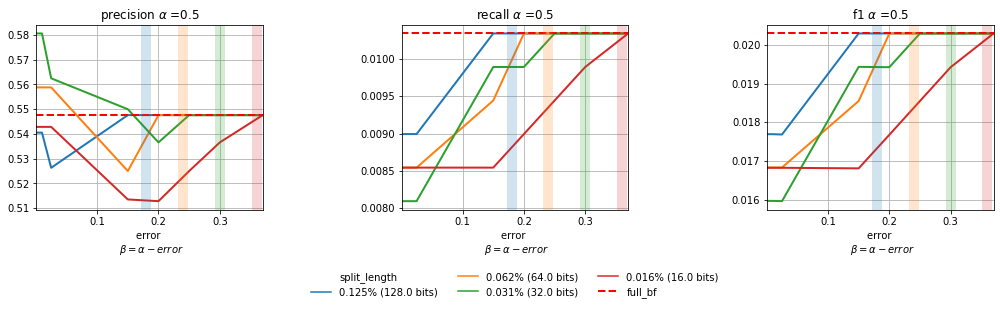

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Dados\\OneDrive\\Doutorado\\workspace\\bc-playground\\results\\vldb\\plot_all_quality_considering_error_dblp-acm_alfa_0.5_width_region.png'

<Figure size 432x288 with 0 Axes>

In [30]:
plot_all_quality_considering_error(final_result[final_result.beta_error <= .49], .5 ,pontos=pontos ,fs=(14,5))

In [14]:
def plot_all_quality_considering_error_v(df,limiar,ds='dblp-acm',pontos=[],fs=(12, 5.5)):
    """

    :param df:
    :param limiar:
    :param ds:
    :return:
    """

    ldf = df[df.alfa == limiar]

    ldf['z'] = ldf.bf_len / ldf.sbf_splits
    ldf.z = ldf.z.astype(int)
    ldf['split_length'] = ldf.ls.round(3).astype(str) + '% '
    ldf.split_length = ldf.split_length + '(' +ldf.z.astype(str) + ' bits)'
    ldf['beta'] = limiar - ldf.beta_error
    # min_x = ldf.beta.min()
    # max_x = ldf.beta.max()
    min_x = ldf.beta_error.min()
    max_x = ldf.beta_error.max()

    fig, axs = plt.subplots(3,1,figsize=fs)
    metrics = ['f1','precision', 'recall']
    for i in range(0, len(axs)):
        metric = metrics[i]
#         print(metric)

        ax = axs[i]
        ax.set_xlim(min_x,max_x)
        # ax.set_xlim(max_x,min_x)
        
        if metric == 'f1':
            m = metric.upper()
        else:
            m = metric        
        ax.set_title(r"" +m + " $\\alpha$ ="+ str(limiar) )

        g = sns.lineplot(data=ldf, x='beta_error', y=metric + '_sbf',
                         hue="split_length", ax=ax , linewidth=2)
        # g = sns.lineplot(data=ldf, x='beta', y=metric+'_sbf',
        #                 hue="split_length", ax=ax)

        ax.set_ylabel("")
        ax.set_xlabel("error \n $\\beta = \\alpha - error$")

        y = []
        for x in ax.get_xticks():
            y.append(ldf[metric+'_bf_full'].mean())

        ax.plot(ax.get_xticks(), y, color='red',
                linestyle='--', linewidth=2, label='full_bf')

        #### errros
        if len(pontos) != 0:
            if metric == 'f1':
                cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
                cc = 0
                for vx in pontos.round(2).y:
                    # ax.axvline(x=vx, linewidth=2, c=c.colors[cc], alpha=0.8)
                    ax.axvline(x=vx, linewidth=10, c=cores[cc], alpha=0.2)
                    cc+=1
            # ax.scatter(pontos.x, pontos.y ,c=pontos.x, #s=scale, label=color,
            #         alpha=0.8, edgecolors='none')

            # ax.axhline(pontos.y, linewidth=2, c=pontos.x, alpha=0.8)


        ax.grid(True)
        if i == 2:
            g.legend(loc='lower center', bbox_to_anchor= (0.5, -.5) ,
                     borderaxespad=0, frameon=False,
                     fontsize = 'medium', ncol=3 )
        else:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
            ax.get_legend().remove()
            # fontsize: int or float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.clf()
    if len(pontos) == 0:
        file = getbase_dir(['results', 'vldb']) + 'plot_all_quality_considering_error_'+ds+'_alfa_'+str(limiar)+'.png'
    else:
        file = getbase_dir(['results', 'vldb']) + 'plot_all_quality_considering_error_' +ds+ '_alfa_' + str(limiar) + '_width_region.png'
    
#     fig.savefig(file,dpi=300)
    file = getbase_dir(['results', 'vldb']) + 'v_plot_all_quality_considering_error_' +ds+ '_alfa_' + str(limiar) + '_width_region.pdf'
#     fig.savefig(file)

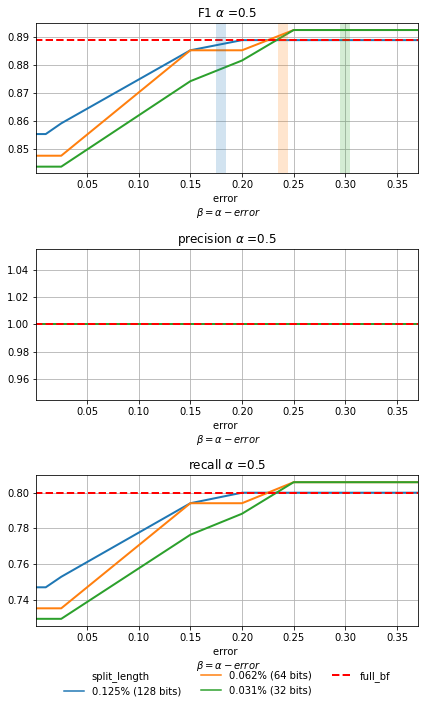

<Figure size 432x288 with 0 Axes>

In [15]:
# final_result = final_result[final_result.ds_name != 'dblp-acm']
t = final_result[final_result.ds_name == 'ncvr']

plot_all_quality_considering_error_v(t[(t.beta_error <= .49) & (t.sbf_splits < 128)], .5 ,pontos=pontos,fs=(6,10))

##### Apenas um

In [32]:
def plot_f1_quality_detail(df,limiar,ds='dblp-acm',pontos=[],
                           fs=(4, 3.5),legenda=False):
    """

    :param df:
    :param limiar:
    :param ds:
    :return:
    """

    ldf = df[df.alfa == limiar]

    ldf['z'] = ldf.bf_len / ldf.sbf_splits
    ldf.z = ldf.z.astype(int)
    ldf['split_length'] = ldf.ls.round(3).astype(str) + '% '
    ldf.split_length = ldf.split_length + '(' +ldf.z.astype(str) + ' bits)'
    ldf['beta'] = limiar - ldf.beta_error
    # min_x = ldf.beta.min()
    # max_x = ldf.beta.max()
    min_x = ldf.beta_error.min()
    max_x = ldf.beta_error.max()

    fig, axs = plt.subplots(figsize=fs)
    metrics = ['f1']
    for i in range(0, len(metrics)):
        metric = metrics[i]
#         print(metric)

        ax = axs
        ax.set_xlim(min_x,max_x)
        # ax.set_xlim(max_x,min_x)
        
        if metric == 'f1':
            m = metric.upper()
        else:
            m = metric
        
        r"" +m + " $\\alpha$ ="+ str(limiar)
        ax.set_title(r"" + ds + " - " + m + " ($\\alpha$ ="+ str(limiar) +")")

        g = sns.lineplot(data=ldf, x='beta_error', y=metric + '_sbf',
                         hue="split_length", ax=ax , linewidth=2)
        # g = sns.lineplot(data=ldf, x='beta', y=metric+'_sbf',
        #                 hue="split_length", ax=ax)

        ax.set_ylabel(m)
        ax.set_xlabel("$error = \\alpha - \\beta$")

        y = []
        for x in ax.get_xticks():
            y.append(ldf[metric+'_bf_full'].mean())

        ax.plot(ax.get_xticks(), y, color='red',
                linestyle='--', linewidth=2, label='full_bf')

        #### errros
        if len(pontos) != 0:
            if metric == 'f1':
                cores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
                cc = 0
                for vx in pontos.round(2).y:
                    # ax.axvline(x=vx, linewidth=2, c=c.colors[cc], alpha=0.8)
                    ax.axvline(x=vx, linewidth=10, c=cores[cc], alpha=0.2)
                    cc+=1
            # ax.scatter(pontos.x, pontos.y ,c=pontos.x, #s=scale, label=color,
            #         alpha=0.8, edgecolors='none')

            # ax.axhline(pontos.y, linewidth=2, c=pontos.x, alpha=0.8)


        ax.grid(True)
        if legenda:
            g.legend(loc='lower center', bbox_to_anchor= (0.5, -.5) ,
                     borderaxespad=0, frameon=False,
                     fontsize = 'small', ncol=2 )
        else:
#             ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
            ax.get_legend().remove()
            # fontsize: int or float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
            
    plt.tight_layout()
    plt.show()
    plt.close()
    plt.clf()
    
    file = getbase_dir(['results', 'figs']) + 'v_plot_all_quality_considering_error_' +ds+ '_alfa_' + str(limiar) + '_width_region.pdf'
    fig.savefig(file)

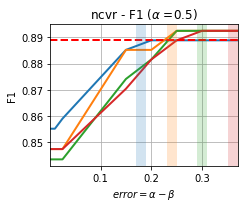

<Figure size 432x288 with 0 Axes>

In [33]:
ds_filtro = 'ncvr'
t = final_result[final_result.ds_name == ds_filtro]

plot_f1_quality_detail(t[(t.beta_error <= .49) & (t.sbf_splits < 128)], .5 ,
                       ds=ds_filtro,pontos=pontos,fs=(3.5,3),legenda=False)

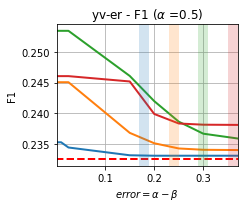

<Figure size 432x288 with 0 Axes>

In [36]:
ds_filtro = 'yv-er'
t = final_result[final_result.ds_name == ds_filtro] 

plot_f1_quality_detail(t[(t.beta_error <= .49) & (t.sbf_splits < 128)], .5 ,
                       ds=ds_filtro,pontos=pontos,fs=(3.5,3),legenda=False)

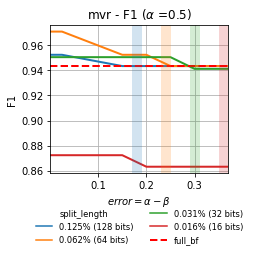

<Figure size 432x288 with 0 Axes>

In [37]:
ds_filtro = 'mvr'
t = final_result[final_result.ds_name == ds_filtro] 

plot_f1_quality_detail(t[(t.beta_error <= .49) & (t.sbf_splits < 128)], .5 ,
                       ds=ds_filtro,pontos=pontos,fs=(3.5,4.2),legenda=True)

antigos

plota o restante dos graficos

In [ ]:
plot_all_quality_considering_error(final_result,.4)
plot_all_quality_considering_error(final_result, .5)
plot_all_quality_considering_error(final_result,.6)
plot_all_quality_considering_error(final_result,.7)
plot_all_quality_considering_error(final_result,.8)
plot_all_quality_considering_error(final_result,.9)

In [ ]:

#df['beta'] = limiar - df.beta_error
#x = df[df.abel_1st_s == True].round(3).beta.astype(str)

In [ ]:
limiar = .5
s = 16
all_df =  x_final[(x_final.alfa == limiar) & (x_final.beta_error <= .49)]
#               &(x_final.sbf_splits == s)
#              & (x_final.beta_error <= .49)]

x = []
y = []
h = []
for s in all_df.sbf_splits.unique()[:-1]:
    
    df = all_df[all_df.sbf_splits == s]
    
    for b in df.beta_error.unique():
        x.append(b)
        ltotal = len(df[df.beta_error == b])
        yl = len(df[(df.beta_error == b) & (df.abel_1st_s == True)])
        y.append(yl/ltotal)
        h.append(str(s))
    del yl
    del ltotal

In [ ]:
pdf = pd.DataFrame({'x':x,'y':y,'cor':h})
# pdf['cor'] = pdf.x.astype(str)

## Grafico reducao

In [5]:
import warnings
warnings.filterwarnings('ignore')

lendo os dados

In [4]:
v = 'alfa5vldb'
b = 'alfa5vldb-blocada'

xfa = 'dblp_acm_x_final_'+v+'.csv'
xfb = 'dblp_acm_x_final_'+v+'.csv'


x_all= pd.read_csv(getbase_dir(['results', 'abel_01']) + xfa)
x_blk= pd.read_csv(getbase_dir(['results', 'abel_01']) + xfb)


In [210]:
v = 'allAlfas'
x_final = []

for ds in ['ncvr','mvr','yv-er']:
    rf = ds+'_'+v+'.csv'
    if len(x_final) == 0:
        x_final = pd.read_csv(getbase_dir(['results', 'abel_output']) + rf)
    else:
        x_final = pd.concat([x_final,
                            pd.read_csv(getbase_dir(['results', 'abel_output']) + rf)])
    

In [6]:
def corrigir_dados(x_final,limiar = .5):

    tdf =  x_final[(x_final.alfa == limiar) & 
                   (x_final.beta_error <= .6) & 
                   (x_final.sbf_splits < 128) ]
    tdf['x'] = tdf.beta_error
    x = []
    y = []
    h = []
    # for s in all_df.sbf_splits.unique():
    for lx in tdf['x'].unique()[:-1]:
        for s in tdf[(tdf['x'] == lx)].sbf_splits.unique():
            _temp = tdf[(tdf.x == lx) & (tdf.sbf_splits == s)]
            ltotal = len(_temp)
            yl = len(_temp[_temp.abel_1st_s == True])
    #         print(ltotal)
    #         print(yl)
    #         print('-'*10)
            x.append(lx)
            y.append(1-(yl/ltotal))
            h.append(str(s))

    pdf = pd.DataFrame({'x':x,'y':y,'split':h})
    pdf.x = pdf.x.round(2)
    
    pdf.split = pdf.split.astype(int)
    pdf['split_length'] = 1024 / pdf.split
    pdf['split_length'] =pdf['split_length'].astype(int)
    pdf = pdf.sort_values(by=['split'],ascending=False)
    pdf.split = ( (1024 / pdf.split) / 1024 ) * 100
    pdf.split = pdf.split.round(1)
    pdf.split = pdf.split.astype(str) + '% ('+pdf.split_length.astype(str)+' bits)'
    
    return pdf
# len(_temp[_temp.abel_1st_s == False]),len(_temp[_temp.abel_1st_s == True]),len(_temp)

In [6]:
pdf_a = corrigir_dados(x_all)
pdf_b = corrigir_dados(x_blk)

pdf_a['src'] = 'all'
pdf_b['src'] = 'blocked'

pdf = pd.concat([pdf_a,pdf_b])
pdf = pdf_a
# pdf

D:\Programas\Anaconda3\envs\utils\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [212]:
pdf = corrigir_dados(x_final)

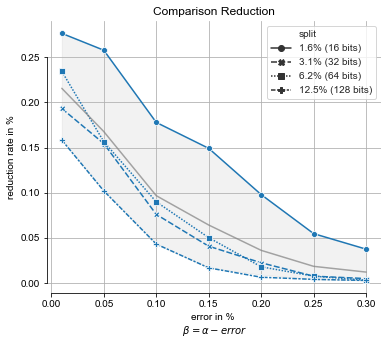

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.lineplot(x="x", y="y", data=pdf,
             style="split",
             markers=True, dashes=True, ci=None,
             ax=ax)

g = sns.lineplot(x="x", y="y", data=pdf,
             color= 'gray' , alpha = .7,
             markers=True, dashes=False, ci = 100,
             ax=ax)

plt.setp(g.collections[0], alpha=0.1) # alpha do ci

# ax.set(yscale="log")

# ax.set_xticklabels(['.01','.05','.10','.15','.20','.25','.30','.35'])
sns.despine(trim=True)
ax.set_title("Comparison Reduction" )
ax.set_ylabel("reduction rate in %")
ax.set_xlabel("error in % \n $\\beta = \\alpha - error$")
# ax.set(yscale="log")
ax.grid(True)

plt.show()
plt.close()
plt.clf()
# file = getbase_dir(['results', 'vldb']) + "reduction_rate_alfa_05.png"
# fig.savefig(file,dpi=300)
file = getbase_dir(['results', 'vldb']) + "new_reduction_rate_alfa_05.pdf"
fig.savefig(file)

# sns.despine(offset=.1, trim=True)

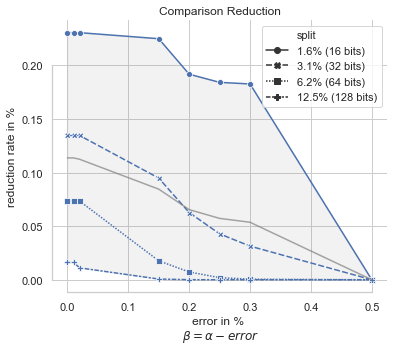

<Figure size 432x288 with 0 Axes>

In [213]:
fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.lineplot(x="x", y="y", data=pdf,
             style="split",
             markers=True, dashes=True, ci=None,
             ax=ax)

g = sns.lineplot(x="x", y="y", data=pdf,
             color= 'gray' , alpha = .7,
             markers=True, dashes=False, ci = 100,
             ax=ax)

plt.setp(g.collections[0], alpha=0.1) # alpha do ci

# ax.set(yscale="log")

# ax.set_xticklabels(['.01','.05','.10','.15','.20','.25','.30','.35'])
sns.despine(trim=True)
ax.set_title("Comparison Reduction" )
ax.set_ylabel("reduction rate in %")
ax.set_xlabel("error in % \n $\\beta = \\alpha - error$")
# ax.set(yscale="log")
ax.grid(True)

plt.show()
plt.close()
plt.clf()
# file = getbase_dir(['results', 'vldb']) + "reduction_rate_alfa_05.png"
# fig.savefig(file,dpi=300)
file = getbase_dir(['results', 'vldb']) + "new_reduction_rate_alfa_05.pdf"
# fig.savefig(file)

# sns.despine(offset=.1, trim=True)

### modelo

erro estimado dos dados

In [27]:
rdf = pdf[pdf.src == 'all']
rdf['x2'] = 1024/rdf.split_length 
l = rdf.pop('split')
l = rdf.pop('split_length')
l = rdf.pop('src')
del l
rdf

D:\Programas\Anaconda3\envs\utils\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,x2
27,0.30,0.037355,64.0
11,0.10,0.177883,64.0
3,0.01,0.276608,64.0
23,0.25,0.054551,64.0
19,0.20,0.097836,64.0
7,0.05,0.257931,64.0
15,0.15,0.149125,64.0
26,0.30,0.004744,32.0
22,0.25,0.007412,32.0
18,0.20,0.022235,32.0


In [ ]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
>>>
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


scipy.optimize.curve_fit(lambda x,a,b: a*numpy.exp(b*t),  x,  y, )

D:\Programas\Anaconda3\envs\utils\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


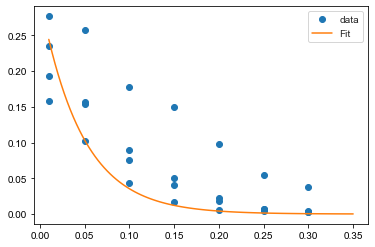

In [69]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exponential_fit(X, a, b, c,d):
    x1 = X[0] # tamanho do split
    x2 = X[1] # error
    
    return a*np.exp(-b*x1) + d*np.exp(-c*x2)
#     return a*np.log(b*x) + c
#    return a*np.exp(b*x) + c
#     return a*np.exp(-b*x) + c

X = ( np.array(rdf.x), np.array(rdf.x2) )
y = np.array(rdf.y)
fitting_parameters, covariance = curve_fit(exponential_fit, X, y)
a, b, c ,d = fitting_parameters

x_min = 0 
x_max = .8                                #min/max values for x axis
x_fit1 = np.linspace(x_min, x_max, 100)   # tamanho do split
x_fit2 = np.linspace(0.01, 0.35, 100)   # error beta

x_fit = (x_fit1,x_fit2)
plt.plot(rdf.x, rdf.y, 'o', label='data')
plt.plot(x_fit2, exponential_fit(x_fit, *fitting_parameters), '-', label='Fit')

# plt.axis([x_min, x_max, 0, .35])
plt.legend()
plt.show()

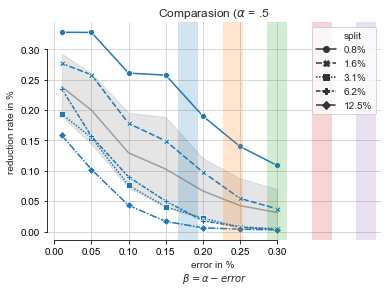

<Figure size 432x288 with 0 Axes>

In [210]:
### Resto

In [125]:
# sns.pointplot(x="x", y="y",capsize=.2,
#             data=pdf)

## Iterações

In [9]:
q2 = lambda p,s: np.ceil((p-1)*(1/s)/2)
parties = np.arange(2,6,1)
sp = np.array([.33])
# q2(parties,sp)
y = np.array([q2(parties,xi) for xi in sp])
y

array([[2., 4., 5., 7.]])

In [16]:
q2 = lambda p,s: np.ceil((p-1)*(1/s)/2)-1 #ok
q2 = lambda p,s: np.ceil((p-1)*((1/s)/p))
# q2 = lambda p,s: np.ceil((p)*(1/s)/2) 
q2(6,.05)

17.0

In [17]:
# q2 = lambda nparties,slice_p: np.ceil(((1/slice_p) - 1 / nparties) / nparties) # pre
# q2 = lambda p,s: np.ceil((p-1)*(1/s)/2)
# q2 = lambda p,s: np.ceil((p-1)*(1/s)/2)-1 #plotado
q2 = lambda p,s: np.ceil((p-1)*((1/s)/p))
# q2 = lambda p,s: np.ceil((p-1)*(1/s)/(2*p)) #acho que e esse
# q2 = lambda p,s: np.ceil((p)*(s-1)/2)

In [18]:
# q2 = lambda p,s: np.ceil((p-1)*(1/s)/2)-1 #plotado
q2 = lambda p,s: np.ceil((p-1)*((1/s)/p))
parties = np.arange(2,6,1)
sp = np.array([.01,.02,.05,.1,.15,.25])
# q2(parties,sp)
y = np.array([q2(parties,xi) for xi in sp])

dfp = []
for si in range(0,len(sp)):
    s = sp[si]
    for pi in range(0,len(parties)):
        p = parties[pi]
        ysp = y[si][pi]
        dfp.append({'split':s,'parties':p,'y':ysp})

dfp = pd.DataFrame(dfp)
y

array([[50., 67., 75., 80.],
       [25., 34., 38., 40.],
       [10., 14., 15., 16.],
       [ 5.,  7.,  8.,  8.],
       [ 4.,  5.,  5.,  6.],
       [ 2.,  3.,  3.,  4.]])

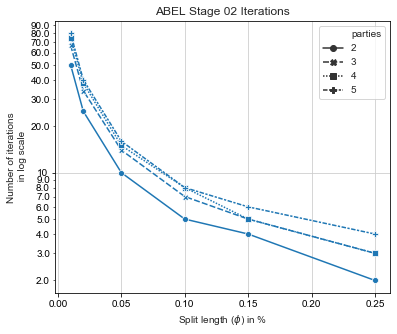

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.lineplot(x="split", y="y", data=dfp,
             style="parties",
             markers=True, dashes=True, ci=None,
             ax=ax)


# ax.set(yscale="log")

# ax.set_xticklabels(['.01','.05','.10','.15'])
# sns.despine(trim=True)
ax.set_title("ABEL Stage 02 Iterations" )
ax.set_ylabel("Number of iterations\n in log scale")
ax.set_xlabel("Split length ($\\phi$) in %")
ax.set(yscale="log")
# ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))

import matplotlib.ticker as ticker
#ax.yaxis.set_minor_locator(ticker.MaxNLocator(4))

#ok
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.grid(True)

plt.show()
plt.close()
plt.clf()
file = getbase_dir(['results', 'vldb']) + "abel_iteration.pdf"
fig.savefig(file)

### Novo e correto

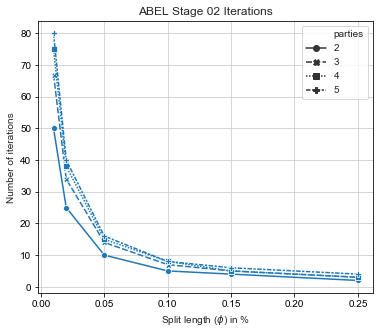

<Figure size 432x288 with 0 Axes>

In [21]:
q2 = lambda p,s: np.ceil((p-1)*(1/s)/(p)) #plotado
parties = np.arange(2,6,1)
sp = np.array([.01,.02,.05,.1,.15,.25])
y = np.array([q2(parties,xi) for xi in sp])

dfp = []
for si in range(0,len(sp)):
    s = sp[si]
    for pi in range(0,len(parties)):
        p = parties[pi]
        ysp = y[si][pi]
        dfp.append({'split':s,'parties':p,'y':ysp})

dfp = pd.DataFrame(dfp)
fig, ax = plt.subplots(figsize=(6,5))
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.lineplot(x="split", y="y", data=dfp,
             style="parties",
             markers=True, dashes=True, ci=None,
             ax=ax)


# ax.set(yscale="log")

# ax.set_xticklabels(['.01','.05','.10','.15'])
# sns.despine(trim=True)
ax.set_title("ABEL Stage 02 Iterations" )
ax.set_ylabel("Number of iterations")
ax.set_xlabel("Split length ($\\phi$) in %")
# ax.set(yscale="log")
# import matplotlib.ticker as ticker
# #ax.yaxis.set_minor_locator(ticker.MaxNLocator(4))
# #ok
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

ax.grid(True)

plt.show()
plt.close()
plt.clf()
file = getbase_dir(['results', 'vldb']) + "abel_iteration.pdf"
fig.savefig(file)

In [30]:
q2(5,.25),q2(2,.05),q2(2,.025),q2(5,.01)

(4.0, 10.0, 20.0, 80.0)

# Pre-Scratch

In [ ]:
n_ds1=2617
n_ds2=2294

t = n_ds1 * n_ds2
df['x'] = df[df.abel_1st_s == True].round(3).beta_error.astype(str)
df['y'] = 1 / t
df['y'] = 1
from matplotlib.ticker import PercentFormatter


total = len(df[df.x == '0.33'])

fig, ax = plt.subplots(figsize=(8, 5))
# g = sns.catplot(x="x", y="y", hue="y", kind="bar", data=df)
# for ax in g.axes.flat:
#     ax.yaxis.set_major_formatter(PercentFormatter(1))
# plt.show()
# g = sns.catplot(x="x", kind="count", data=df)

g = sns.countplot(x="x", data=df)  # for Seaborn version 0.7 and more
for p in g.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}'.format(height)/total,
            ha="center")
ax.grid(True)
plt.show()
plt.close()
plt.clf()

#file = getbase_dir(['results', 'abel_01']) + 'zzz_05_alfa_' + '.png'
#fig.savefig(file, dpi=400)

# Scratch

In [ ]:
    # final_result[(final_result.sbf_splits != 128) & (final_result.sbf_splits != 64)

    n_ds1=2617
    n_ds2=2294

    t = n_ds1 * n_ds2
    df['x'] = df[df.abel_1st_s == True].round(3).beta.astype(str)
    df['y'] = 1 / t
    df['y'] = 1
    from matplotlib.ticker import PercentFormatter


    total = len(df[df.x == '0.33'])

    fig, ax = plt.subplots(figsize=(8, 5))
    # g = sns.catplot(x="x", y="y", hue="y", kind="bar", data=df)
    # for ax in g.axes.flat:
    #     ax.yaxis.set_major_formatter(PercentFormatter(1))
    # plt.show()
    # g = sns.catplot(x="x", kind="count", data=df)

    g = sns.countplot(x="x", data=df)  # for Seaborn version 0.7 and more
    for p in g.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}'.format(height / total),
                ha="center")
    ax.grid(True)
    plt.show()
    plt.close()
    plt.clf()

    file = getbase_dir(['results', 'abel_01']) + 'zzz_05_alfa_' + '.png'
    fig.savefig(file, dpi=400)



##########################################################################
### scratch
########################################################################
def exec_01(n):
    import time
    start_time = time.time()
    ids_a = [640999,190649, 615205, 375780, 375736]
    ids_b = ['journals/sigmod/Winslett03','journals/sigmod/Kim94', 'conf/sigmod/BlakeleyD00', 'conf/sigmod/NazeriBO01', 'conf/sigmod/BorkarDS01' ]
    for a in ids_a:
        for b in ids_b:
            print(isTrueMatchOriginal(gs, b, a))
    print(time.time() - start_time)


print(exec_01(1))

gs =  gold_standard_dblp_acm.copy()

gs.set_index(['idDBLP', 'ix'])

ida = 'journals/sigmod/Winslett03'
idb = 640999


d = {}
for indexa, row in gs.iterrows():
    d[str(row[0])+str(row[1])] = True

def isTrueMatch2(gs,ida,idb,base_a='idDBLP',base_b='idACM'):
    try:
        gs[str(ida)+str(idb)]
        return True
    except KeyError:
        print
        return False
    #     # gs[(gs[base_a] == ida) & (gs[base_b] == idb)]
    # if len(z) == 1:
    #     return True
    #
    # return False